### Import das libs necessarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import joblib

### Criação de um dataset sinstetico para ilustração

In [2]:
# Crie um conjunto de dados sintético
data, ground_truth = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Crie um DataFrame do Pandas
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Exiba as primeiras linhas do DataFrame
df.head()

,Feature1,Feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


### Treinando um kmeans

- Cuidados (variaveis categoricas, outliers)

In [3]:
# Vamos testar um número de clusters variando de 2 a 10
num_clusters = list(range(2, 11))

wcss = []  # Lista para armazenar os valores WCSS
silhouette_scores = []  # Lista para armazenar os valores de Silhouette

for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42,)
    kmeans.fit(df)
    
    # WCSS (Within-Cluster-Sum-of-Squares)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

### Escolha do número de K

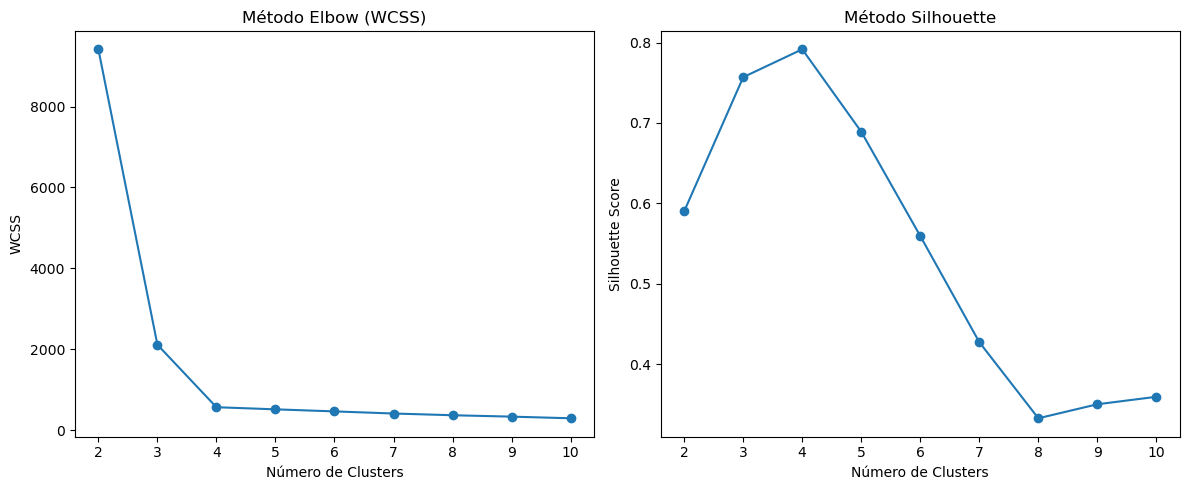

In [4]:
#Plote o gráfico do método Elbow (WCSS)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters, wcss, marker='o')
plt.title('Método Elbow (WCSS)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# Plote o gráfico do método Silhouette
plt.subplot(1, 2, 2)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Método Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Com base nos gráficos acima, escolha o número ideal de clusters
ideal_clusters = 4  # Escolha o valor apropriado com base nos gráficos


### Treinando o melhor modelo com k = 4

### Treinando e Salvando o modelo

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

# Salve o modelo em um arquivo
model_filename = "kmeans_model.pkl"
joblib.dump(kmeans, model_filename)

print(f"Modelo K-Means salvo em {model_filename}")

Modelo K-Means salvo em kmeans_model.pkl


### Reutilizando o modelo para aplicação em dados novos

In [6]:
# Nome do arquivo onde o modelo foi salvo
model_filename = "kmeans_model.pkl"

# Carregue o modelo K-Means de volta
loaded_kmeans = joblib.load(model_filename)

#novos dados
new_data = df.copy()

#print dado de escoragem antes do predict
new_data.head()

#escoragem
new_data['cluster'] = loaded_kmeans.predict(new_data)

#print dado de escoragem depois do predict
new_data.head()

,Feature1,Feature2,cluster
0,-9.297689,6.473679,1
1,-9.698741,6.938967,1
2,-1.686653,7.793442,3
3,-7.097308,-5.781333,2
4,-10.876452,6.315437,1


### Análise pós modelo

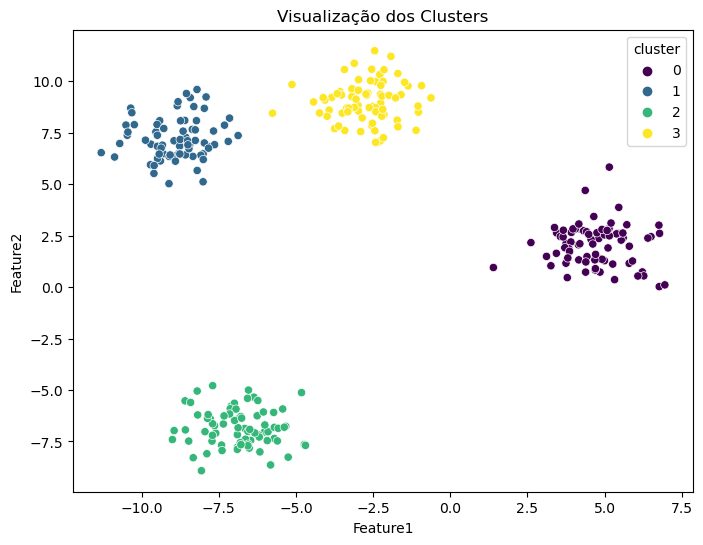

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Feature1', y='Feature2', hue='cluster', palette='viridis')
plt.title('Visualização dos Clusters')
plt.show()
